# The Sparks Foundation- GRIP- Data Science and Business Analytics- August 2021

# Task 1- Prediction Using Supervised ML

# Author: Pratiksha G Rao, Data Science and Business Analytics Intern (Aug 2021)


## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Data sample: http://bit.ly/w-data


In [1]:
#import all the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
#read the data and display
student_data = pd.read_csv("http://bit.ly/w-data")
print(student_data.shape)
student_data

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#an insight into the data
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


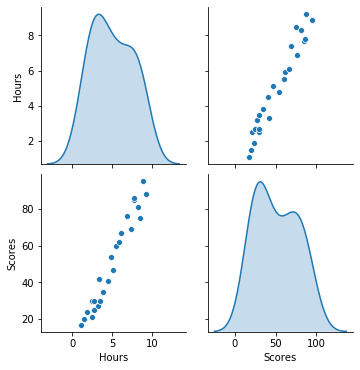

In [5]:
#data visualisation
#a plot to understand correlation between the attributes 'Marks Percentage' and 'Hours studied'
student_data_plot = student_data.iloc[:, 0:20]
sns.pairplot(student_data_plot, diag_kind = 'kde')

Text(0.5, 1.0, 'Hours vs Scores')

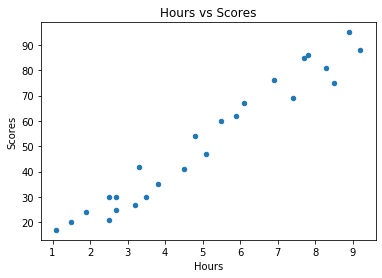

In [6]:
#scatter plot
student_data.plot(kind='scatter', x='Hours', y='Scores')
plt.title('Hours vs Scores')

In [7]:
#splitting the dataset into dependent and independent variables 
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  

In [8]:
#splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(17, 1)
(8, 1)


In [9]:
#Fit Linear model
student_regression_model = LinearRegression().fit(X_train, y_train)

In [10]:
#predicting the results
print(X_test)
student_pred = student_regression_model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


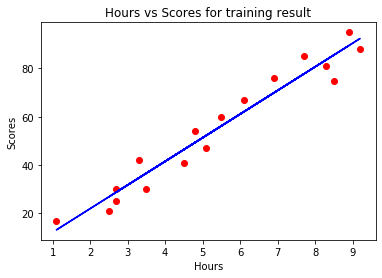

In [11]:
#visualise the training set prediction
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, student_regression_model.predict(X_train), color='blue')
plt.title('Hours vs Scores for training result')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

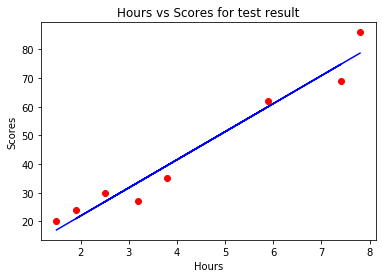

In [12]:
#visualise the test set prediction
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, student_regression_model.predict(X_test), color='blue')
plt.title('Hours vs Scores for test result')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [13]:
#comparing actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': student_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [14]:
#Testing/Predicting with our own data
hours = 9.25
own_pred = student_regression_model.predict([[hours]])
print("If a student studies for 9.25 hours per day then he/she can score", own_pred[0], "%")

If a student studies for 9.25 hours per day then he/she can score 92.91505723477056 %


In [15]:
#Checking the scores of training and testing model
print(student_regression_model.score(X_train, y_train))
print(student_regression_model.score(X_test, y_test))

0.9484997422695115
0.9568211104435257


In [16]:
#Checking the mean absolute error of the model
from sklearn import metrics 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, student_pred))

Mean Absolute Error: 4.419727808027652


In [17]:
#Checking the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test, student_pred)
print("Accuracy of the model is:", r2_score(y_test, student_pred)*100, '%')

Accuracy of the model is: 95.68211104435257 %
